In [1]:
# imorting the basic libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


## `Task` : 
### 1.Data Cleaning and EDA
### 2. Customer Segmentation using RFM analysis
### 3. Customer Segementation using K-means, Hierarchical and DBSCAN
### 4. Analysis of Customer Retention Rates using `Cohort Analysis`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [4]:
### For RFM analysis the important columns
### CustomerID       - Mandatory
### InvoiceNo        - Frequency
### Date of purchase - Recency 
### Price            - Monetory

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [7]:
## dropping the other remaining columns which not significant fpr RFM analysis
df.drop(columns = ['Item Code', 'Quantity', 'price per Unit', 'Time', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'], axis = 1, inplace = True)

In [8]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [9]:
## checking the duplicates 
df.duplicated().sum()

6008

In [10]:
## dropping the duplicate values from the dp
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
## checking the minimum price
df.Price.min()

-10152.0

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,402859.0,2182.187224,1252.636483,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,535107.0,385009.702116,13418.210488,361429.0,372964.0,385665.0,396811.0,406651.0
Price,535107.0,2167.848915,4547.338495,-10152.0,453.0,1200.0,2236.0,90400.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535108 entries, 0 to 537979
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          535107 non-null  float64
 2   Date of purchase  535107 non-null  object 
 3   Price             535107 non-null  float64
dtypes: float64(3), object(1)
memory usage: 20.4+ MB


In [15]:
## Checking the missing value in the df
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / len(df)).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['missing_number', 'missing_percent'])
    return missing_values[missing_values["missing_number"] > 0]

missing_values(df)

,missing_number,missing_percent
CustomerID,132249,0.247145
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002


In [16]:
## dropping the missing rows
df = df.dropna(subset = ['CustomerID'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [18]:
# handling the 'Date of purchase' datatype to dt
import datetime
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [19]:
## renaming the columns
df = df.rename(columns = {'InvoieNo' : 'InvoiceNo', 'Date of purchase' : 'Date'})
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [20]:
df['Date'].describe().T

count                           402859
mean     2017-07-15 14:25:02.538605056
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [21]:
## checking the unique values in the CustomerId
df['CustomerID'].nunique()

4349

In [22]:
## adding one extra date max_date + next_Date
next_date = datetime.datetime(2017, 12, 20)
next_date

datetime.datetime(2017, 12, 20, 0, 0)

# Customer Segementation using RFM Analysis

#### **RFM Analysis** : Is a marketing techniques and method used to evaluate customer behavior.
#### RFM stands for **Recency**, **Frequency** and **Monetray**.

- **Recency** : Indicates how recently a customer has made a purchase. Customer who have purchased more recently have a higher recency score.

- **Frequency** : Represents how many times a customer has made a purchase within a specific timer period(typically within a year). Customer who purchase more frequently have a higher frquency socre.

- **Monetray** : Refers to the total amount a customer has spent within a specific time period.Customer who spends more have a higher monetray score.

- A score of 5 represents the best customers (most recent, most frquent and highest spending)

- A score of 1 represents the lease engaged customers

- **Prime (VIP) Customers**

- **Loyal Customers**

- **Potential Csutomer**

In [23]:
RFMApproach = df.groupby('CustomerID').agg({'Date' : lambda x : (next_date - x.max()).days,
                                           'InvoiceNo' : lambda x : x.count(),
                                           'Price' : lambda x : x.sum()})
RFMApproach.rename(columns = {'Date' : 'Recency', 'InvoiceNo' : 'Frequency', 'Price' : 'Monetary'}, inplace = True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [24]:
RFMApproach.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,93.299379,100.701315,1.0,18.0,51.0,144.0,381.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


In [25]:
# Splitting the data into 4 segments basis quantile method
quantiles = RFMApproach.quantile(q = [0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [26]:
def Recency_value(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [27]:
def Freq_Mont_Value(x, p , d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [28]:
RFMApproach['R'] = RFMApproach['Recency'].apply(Recency_value, args = ('Recency', quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(Freq_Mont_Value, args = ('Frequency', quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(Freq_Mont_Value, args = ('Monetary', quantiles))

In [29]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [30]:
RFMApproach['RFM'] = RFMApproach[['R','F','M']].sum(axis = 1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,9,13,24962.0,1,4,4,9
4347,4371.0,4,751,279720.0,1,1,1,3


In [31]:
RFMApproach['RFM'].value_counts()

RFM
10    508
3     471
7     461
9     458
8     447
5     439
12    410
6     405
11    380
4     370
Name: count, dtype: int64

In [32]:
Loyality_Level = ['platinum', 'gold', 'silver', 'bronze']
score_cuts = pd.qcut(RFMApproach.RFM, q = 4, labels = Loyality_Level)
RFMApproach['Loyality_Level'] = score_cuts.values
RFMApproach

,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
CustomerID,,,,,,,,
2.0,4,181,550416.0,1,1,1,3,platinum
3.0,77,27,257404.0,3,3,1,7,gold
4.0,19,72,176613.0,2,2,2,6,gold
5.0,311,16,41976.0,4,4,3,11,bronze
6.0,37,84,151822.0,2,2,2,6,gold
...,...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,12,bronze
4369.0,181,7,10774.0,4,4,4,12,bronze
4370.0,9,13,24962.0,1,4,4,9,silver


In [33]:
RFMApproach = RFMApproach.reset_index()
RFMApproach

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
0,2.0,4,181,550416.0,1,1,1,3,platinum
1,3.0,77,27,257404.0,3,3,1,7,gold
2,4.0,19,72,176613.0,2,2,2,6,gold
3,5.0,311,16,41976.0,4,4,3,11,bronze
4,6.0,37,84,151822.0,2,2,2,6,gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,bronze
4345,4369.0,181,7,10774.0,4,4,4,12,bronze
4346,4370.0,9,13,24962.0,1,4,4,9,silver
4347,4371.0,4,751,279720.0,1,1,1,3,platinum


In [34]:
## Checking the Count of Loyality_level
RFMApproach['Loyality_Level'].value_counts()

Loyality_Level
gold        1313
platinum    1280
silver       966
bronze       790
Name: count, dtype: int64

In [35]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [36]:
## Creating the final report
final_report = RFMApproach.groupby('Loyality_Level')[['Recency', 'Frequency', 'Monetary', 'CustomerID']].agg({'Recency':'sum',
                                                                                                             'Frequency' : 'sum',
                                                                                                             'Monetary' : 'sum',
                                                                                                             'CustomerID' : 'nunique'}).reset_index()

In [37]:
final_report

,Loyality_Level,Recency,Frequency,Monetary,CustomerID
0,platinum,25971,294629,763311232.0,1280
1,gold,84142,75914,165998506.0,1313
2,silver,121714,23728,50215730.1,966
3,bronze,173932,8588,18543646.0,790


In [38]:
final_report = final_report.rename(columns = {'CustomerID' : 'NumBuyers'})
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers
0,platinum,25971,294629,763311232.0,1280
1,gold,84142,75914,165998506.0,1313
2,silver,121714,23728,50215730.1,966
3,bronze,173932,8588,18543646.0,790


In [39]:
final_report['percent'] = round(final_report['NumBuyers'] / final_report.NumBuyers.sum() * 100, 2)

In [40]:
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers,percent
0,platinum,25971,294629,763311232.0,1280,29.43
1,gold,84142,75914,165998506.0,1313,30.19
2,silver,121714,23728,50215730.1,966,22.21
3,bronze,173932,8588,18543646.0,790,18.17


In [41]:
final_report1 = final_report[['Loyality_Level', 'NumBuyers', 'percent']]

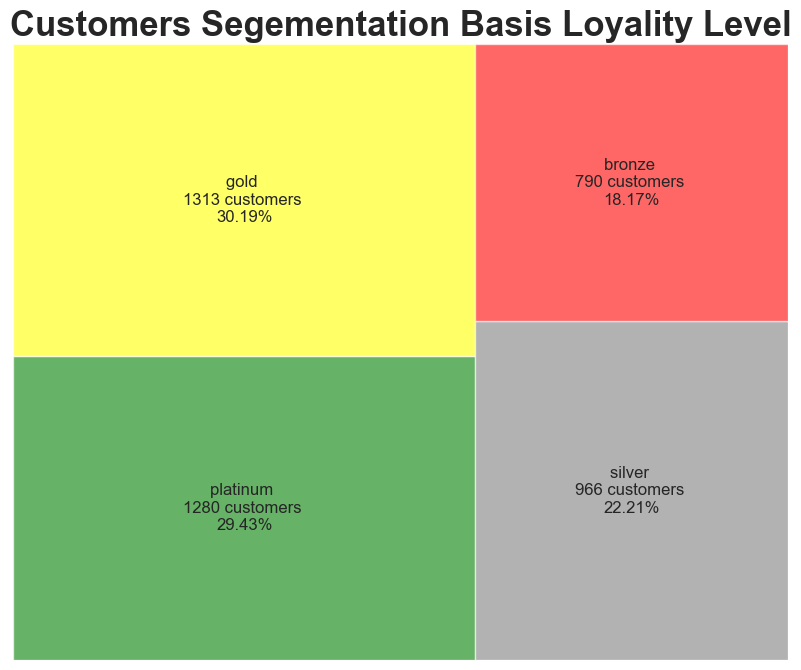

In [42]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10,8)
colors_dict = {'platinum' : 'green', 'gold' : 'yellow', 'silver' : 'gray', 'broze' : 'red'}
squarify.plot(sizes = final_report1['NumBuyers'], color = colors_dict.values(),
             label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report1.iloc[i]) for i in range(0, len(final_report1))], alpha = 0.6)
plt.title("Customers Segementation Basis Loyality Level", fontsize = 25, fontweight = 'bold')
plt.axis('off')
plt.show()

## Task 2 : UnSupervised Machine Learning [Clustering]

In [43]:
## importing the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

In [44]:
RFMApproach.reset_index()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
0,0,2.0,4,181,550416.0,1,1,1,3,platinum
1,1,3.0,77,27,257404.0,3,3,1,7,gold
2,2,4.0,19,72,176613.0,2,2,2,6,gold
3,3,5.0,311,16,41976.0,4,4,3,11,bronze
4,4,6.0,37,84,151822.0,2,2,2,6,gold
...,...,...,...,...,...,...,...,...,...,...
4344,4344,4368.0,278,10,20480.0,4,4,4,12,bronze
4345,4345,4369.0,181,7,10774.0,4,4,4,12,bronze
4346,4346,4370.0,9,13,24962.0,1,4,4,9,silver
4347,4347,4371.0,4,751,279720.0,1,1,1,3,platinum


In [45]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [46]:
rfm_df = RFMApproach[['Recency', 'Frequency', 'Monetary']]
rfm_df.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


In [47]:
# feature scaling the data or Standarization
sc = StandardScaler()
rfm_sc = sc.fit_transform(rfm_df)
rfm_sc

array([[-0.88687668,  0.38301434,  0.37509732],
       [-0.16187726, -0.28447368,  0.0326216 ],
       [-0.73790419, -0.08942848, -0.06180783],
       ...,
       [-0.83721918, -0.34515441, -0.23905922],
       [-0.88687668,  2.85358691,  0.05870479],
       [-0.48961672, -0.10676583,  0.0320933 ]])

## DBSCAN to Identify the noise or outlier and handling those outliers

In [48]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
rfm_df['dbscan'] = dbscan.fit_predict(rfm_sc)
rfm_df

,Recency,Frequency,Monetary,dbscan
0,4,181,550416.0,0
1,77,27,257404.0,0
2,19,72,176613.0,0
3,311,16,41976.0,0
4,37,84,151822.0,0
...,...,...,...,...
4344,278,10,20480.0,0
4345,181,7,10774.0,0
4346,9,13,24962.0,0
4347,4,751,279720.0,0


In [49]:
## checking the outliers
rfm_df['dbscan'].value_counts()

dbscan
 0    4296
-1      43
 2       5
 1       5
Name: count, dtype: int64

In [50]:
# excluding the noise
rfm_clean = rfm_df[rfm_df['dbscan'] != -1].reset_index(drop = True)
rfm_sc_clean = rfm_sc[rfm_df['dbscan'] != -1]

In [51]:
print(rfm_clean.shape)
print(rfm_sc_clean.shape)

(4306, 4)
(4306, 3)


## Part 2 : Customer Segmentation (KMeans)

- Finding Optimal Clusters using Elbow Method

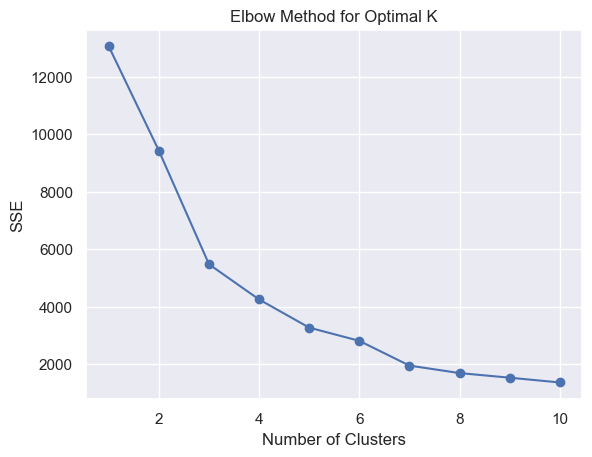

In [52]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(rfm_sc)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel('SSE')
plt.title("Elbow Method for Optimal K")
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
rfm_clean['KMeans_cluster'] = kmeans.fit_predict(rfm_sc_clean)
rfm_clean

,Recency,Frequency,Monetary,dbscan,KMeans_cluster
0,4,181,550416.0,0,0
1,77,27,257404.0,0,0
2,19,72,176613.0,0,0
3,311,16,41976.0,0,1
4,37,84,151822.0,0,0
...,...,...,...,...,...
4301,278,10,20480.0,0,1
4302,181,7,10774.0,0,2
4303,9,13,24962.0,0,0
4304,4,751,279720.0,0,3


In [54]:
rfm_clean['KMeans_cluster'].value_counts()

KMeans_cluster
0    2550
2     776
1     609
3     371
Name: count, dtype: int64

In [59]:
cluster_summary = rfm_clean.groupby('KMeans_cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)

                   Recency   Frequency       Monetary
KMeans_cluster                                       
0                36.357647   66.438039  151335.878863
1               298.758621   22.763547   45011.868637
2               159.644330   37.596649   84688.766753
3                16.272237  374.132075  721920.113208


## Hierarchical Clustering

<Figure size 1000x700 with 0 Axes>

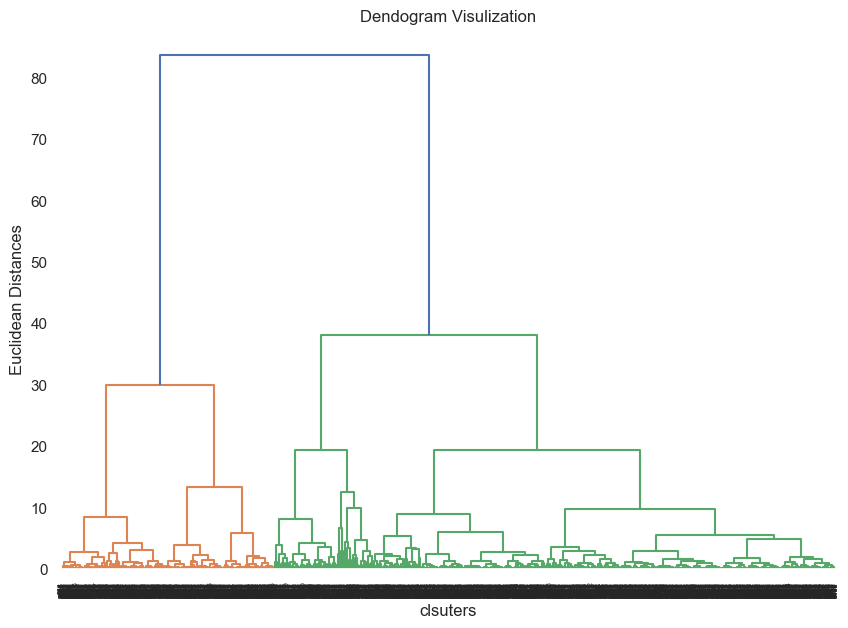

In [62]:
linked = linkage(rfm_sc_clean, method = 'ward')
plt.figure(figsize = (10, 7))
dendrogram(linked)
plt.title("Dendogram Visulization")
plt.xlabel("clsuters")
plt.ylabel("Euclidean Distances")
plt.show()

In [64]:
rfm_clean['Hierarchical_Cluster'] = fcluster(linked, 4, criterion = 'maxclust')
rfm_clean

,Recency,Frequency,Monetary,dbscan,KMeans_cluster,Hierarchical_Cluster
0,4,181,550416.0,0,0,3
1,77,27,257404.0,0,0,4
2,19,72,176613.0,0,0,4
3,311,16,41976.0,0,1,2
4,37,84,151822.0,0,0,4
...,...,...,...,...,...,...
4301,278,10,20480.0,0,1,2
4302,181,7,10774.0,0,2,1
4303,9,13,24962.0,0,0,4
4304,4,751,279720.0,0,3,3


In [65]:
rfm_clean['Hierarchical_Cluster'].value_counts()

Hierarchical_Cluster
4    2568
2     609
1     581
3     548
Name: count, dtype: int64

In [67]:
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


# Cohort Analysis For Customer Retention

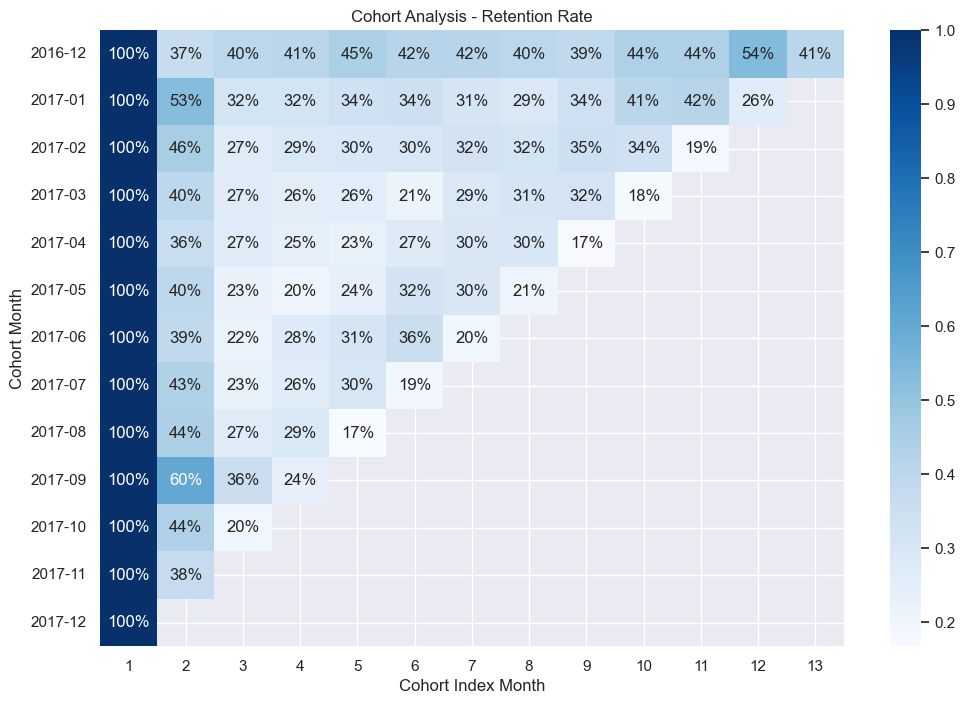

In [72]:
## extracting the month and creating the cohort month
df['Month'] = df['Date'].dt.to_period('M')
df['CohortMonth'] = df.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')

## creating the cohort index (how many months since first purchase)
def cohort_index(df):
    year_diff = df['Month'].dt.year - df['CohortMonth'].dt.year
    month_diff = df['Month'].dt.month - df['CohortMonth'].dt.month
    return year_diff * 12 + month_diff + 1

# creating the new column in the df 
df['CohortIndex'] = cohort_index(df)

# grouping data
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_counts = cohort_data.pivot_table(index = 'CohortMonth', columns = 'CohortIndex', values = 'CustomerID')

## calculating Retention Rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

plt.figure(figsize = (12,8))
sns.heatmap(retention, annot = True, fmt = '.0%', cmap = 'Blues')
plt.title("Cohort Analysis - Retention Rate")
plt.ylabel("Cohort Month")
plt.xlabel("Cohort Index Month")
plt.show()